# Simple Neural Network

Our neural network would have three layers:
1. Input layer
2. Hidden layer with 3 neurons
3. output layer

<img src="ANN.png" alt="Neural Network Architecture" />

1. We have predetermined input size. In our case it's two features, so input size is 3
2. We have one hidden layer has 3 neurons
3. We have predetermined output size

It is possible to change every hardcoded parameters manually

$$Z = W.A\_prev + b$$  

$$A = activation(Z)$$ 
$$
W = W - \alpha.{\frac {dC}{dW}} 
$$ 

$$ 
b = b - \alpha.{\frac {db}{dW}}
$$
  
$$
C = \frac1m\sum{L(y_i, \bar{y_i})}
$$ 

$$
\frac {dC}{dA}: given
$$  
$$
\frac {dC}{dZ} = d\_act(Z) . \frac {dC}{dA}
$$  
$$
\frac {dC}{dW} = \frac {dC}{dZ}.A\_prev^T
$$  
$$
\frac {dC}{db} = \frac {dC}{dZ}
$$  
$$
\frac {dC}{dA\_prev} = W^T . \frac {dC}{dZ}
$$  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Activation Functions
def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.square(np.tanh(x))

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

# Loss Functions 
def logloss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))

In [11]:
# The layer class
class Layer:

    activationFunctions = {
        'tanh': (tanh, d_tanh),
        'sigmoid': (sigmoid, d_sigmoid)
    }
    learning_rate = 0.1

    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)

    def feedforward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A

    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev

In [16]:
x_train = np.array([[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1]]) # dim x m
y_train = np.array([[0, 1, 1, 0, 1, 0, 0, 1]]) # 1 x m

m = 8
epochs = 1300

layers = [Layer(3, 3, 'tanh'), Layer(3, 1, 'sigmoid')]
costs = [] # to plot graph 

for epoch in range(epochs):
    A = x_train
    for layer in layers:
        A = layer.feedforward(A)

    cost = 1/m * np.sum(logloss(y_train, A))
    costs.append(cost)

    dA = d_logloss(y_train, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)


# Making predictions
A = x_train
for layer in layers:
    A = layer.feedforward(A)
print(A)

[[0.21713432 0.63083068 0.69618826 0.17509246 0.6358483  0.69942444
  0.1413229  0.62997417]]


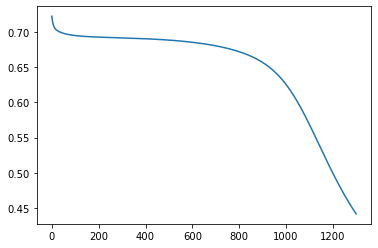

In [17]:
plt.plot(range(epochs), costs)

###### After several training we can see that 0.4 considered as local minimum, because the ANN can be optimize better

### Now lets check the weights and bias of hidden layer to see the functionality of each hidden neuron

In [18]:
for layer in layers:
    print(layer.W)
    print(layer.b)

[[ 1.45266202 -1.22962744  1.28145424]
 [ 2.38174465 -1.47160164  1.70729287]
 [-1.79446496  1.74922874 -1.71716886]]
[[0.69746217]
 [0.72164131]
 [0.57504957]]
[[-1.12657361 -1.46865637 -2.07018874]]
[[1.37866979]]


### Now lets construct the function of hidden units too see whats happening

In [19]:
print("Input Layer: ")
print("sigmoid(X1 * ", 1.45266202, " + X1 * ", -1.22962744, " + X1 * ", 1.28145424, " + ", 0.69746217,")")
print("sigmoid(X2 * ", 2.38174465, " + X2 * ", -1.47160164, " + X2 * ", 1.70729287, " + ", 0.72164131,")")
print("sigmoid(X3 * ", -1.79446496, " + X3 * ", 1.74922874, " + X3 * ", -1.71716886, " + ", 0.57504957,")")
print("---------------------------------------------------------------------------------------------------")
print("Hidden Layer: ")
print("sigmoid(n1 * ", -1.12657361, " + ", 1.37866979,")")
print("sigmoid(n2 * ", -1.46865637,  " + ", 1.37866979,")")
print("sigmoid(n3 * ", -2.07018874, " + ", 1.37866979,")")

Input Layer: 
sigmoid(X1 *  1.45266202  + X1 *  -1.22962744  + X1 *  1.28145424  +  0.69746217 )
sigmoid(X2 *  2.38174465  + X2 *  -1.47160164  + X2 *  1.70729287  +  0.72164131 )
sigmoid(X3 *  -1.79446496  + X3 *  1.74922874  + X3 *  -1.71716886  +  0.57504957 )
---------------------------------------------------------------------------------------------------
Hidden Layer: 
sigmoid(n1 *  -1.12657361  +  1.37866979 )
sigmoid(n2 *  -1.46865637  +  1.37866979 )
sigmoid(n3 *  -2.07018874  +  1.37866979 )


### Now lets check to see how many examples are properly classified

In [20]:
y_pred = A[0]
y_pred_bin = [0 if x < 0.5 else 1 for x in y_pred]
print("Predictions: ", y_pred_bin)
print("Expected: ", y_train[0])

Predictions:  [0, 1, 1, 0, 1, 1, 0, 1]
Expected:  [0 1 1 0 1 0 0 1]
